# GK9102 Data Science "Probabilistische Modellierung" (POSA)

Andreas Sünder - 21.12.2023

## The Bayesian Way

### Grundlagen

Bayesian Inference
* Definition: updating one's beliefs about a hypothesis as new information becomes available.
* is statistically correct even with little data

Darstellen von Wahrscheinlichkeiten in Python:

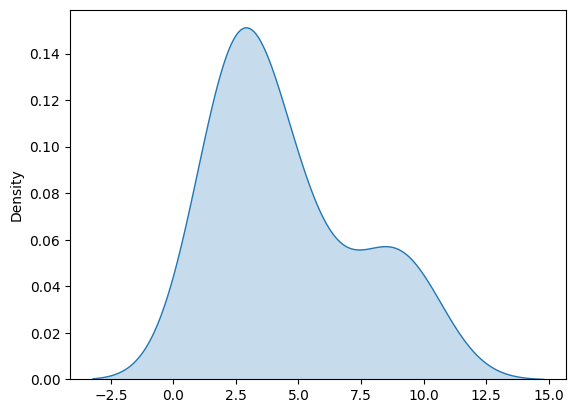

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste der Ziehungen
draws = [4.8965301775481835, 2.7773683448746667, 10.09075099583615, 2.248355277758697, 4.97445385956666, 2.8525720557785617, 1.9606485835258463, 9.094001197650389, 2.899645995467589, 8.161014208247678, 1.503981043342368, 6.309643538930294, 8.819082426904082, 1.472813045574119, 3.3109342512394484, 4.160426132108971, 2.6415037488618496, 3.1823911047498967]

# Darstellen als Plot
sns.kdeplot(draws, fill=True)
plt.show()

Binomialverteilung:
* diskrete Verteilung, die nur zwei Werte annehmen kann (z.B. 0 oder 1)

In Python:

In [6]:
import numpy as np

# Ziehungen simulieren
np.random.binomial(
  100,  # Anzahl der Versuche
  0.5   # Wahrscheinlichkeit für Erfolg  
)

54

Auch kann mit dieser Funktion die Draws direkt erhalten:

In [7]:
np.random.binomial(
  1,      # Anzahl der Versuche auf 1 setzen
  0.5,
  size=5  # Anzahl der Versuche hier angeben
)

array([0, 0, 1, 1, 1])

## Bayesian estimation

## Bayesian inference

## Bayesian linear regression with pyMC3